# Análises Além Tutorial

## Balanceamento de dados a partir do Sexo e Raça (Pretos e Brancos)
## Classificação utilizando Random Forest e Gradient Boosting a partir de Raça como atributo sensível

<br>

# Carregando Conjunto de Dados

In [101]:
import pandas as pd

data = pd.read_csv('2-dados.csv', delimiter=',')

# Balanceamento de Classes

## Utilizando o sexo como atributo sensível

## Oversampling

In [102]:
from imblearn.over_sampling import RandomOverSampler

#criando modelo de oversampling
over_sampler = RandomOverSampler(random_state=99)

In [103]:
#realizando reamostragem oversampling, utilizando o sexo como rótulo para o balanceamento
x_over, y_over = over_sampler.fit_resample(data.drop(['sex'], axis=1), data['sex'])

In [104]:
#concatenando dataframes gerados pelo over sampler, para recolocar o sexo como variável explicativa e mais50k como variável resposta
x_over['sex'] = y_over
data_over = x_over

data_over_y = data_over['mais50k']
data_over_x = data_over.drop(['mais50k'], axis=1)

In [105]:
#contagem da realização do oversampling
data_over_x['sex'].value_counts()

Female    32650
Male      32650
Name: sex, dtype: int64

In [106]:
#convertendo variáveis categóricas
data_over_x_dummies = pd.get_dummies(data_over_x)

In [107]:
#função que executa a classificação justa
def run_classification(classifier, x, y, sensitive_feature):
    demographic_parity = DemographicParity()

    #criação de um segundo classificador de Árvore de Decisão
    #classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)

    mitigator = ExponentiatedGradient(classifier, demographic_parity)

    #realizando o treino do modelo justo e utilizando o sexo como atributo sensível
    mitigator.fit(x, y, sensitive_features=sensitive_feature)

    #previsão dos dados utilizando o modelo justo
    #y_pred_mitigated = mitigator.predict(x)
    return mitigator.predict(x)

#função que calcula as métricas agrupadas
def calculate_metrics(y_true, y_pred, sensitive_feature):
    #agrupamento de métricas para cálculo com MetricFrame
    metrics = {
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'false positive rate': false_positive_rate,
        'true positive rate': true_positive_rate,
        'selection rate': selection_rate
    }

    return MetricFrame(
        metrics=metrics,
        y_true=y_true,
        y_pred=y_pred,
        sensitive_features=sensitive_feature
    )

In [108]:
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, true_positive_rate, count
from sklearn.metrics import accuracy_score, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

decision_tree_oversampling = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)

In [109]:
data_over_prev = run_classification(decision_tree_oversampling, data_over_x_dummies, data_over_y, data_over_x['sex'])

In [110]:
#calcula métricas para os dados com oversampling
over_results = calculate_metrics(data_over_y, data_over_prev, data_over_x['sex'])

print(over_results.overall)
over_results.by_group

accuracy               0.843997
precision              0.823097
recall                 0.308156
false positive rate    0.017161
true positive rate     0.308156
selection rate         0.077044
dtype: object


,accuracy,precision,recall,false positive rate,true positive rate,selection rate
sex,,,,,,
Female,0.927044,0.761249,0.471023,0.017851,0.471023,0.066708
Male,0.760949,0.870312,0.250353,0.016277,0.250353,0.087381


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'precision'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'recall'}, xlabel='sex'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'true positive rate'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='sex'>],
       [<AxesSubplot:xlabel='sex'>, <AxesSubplot:xlabel='sex'>,
        <AxesSubplot:xlabel='sex'>]], dtype=object)

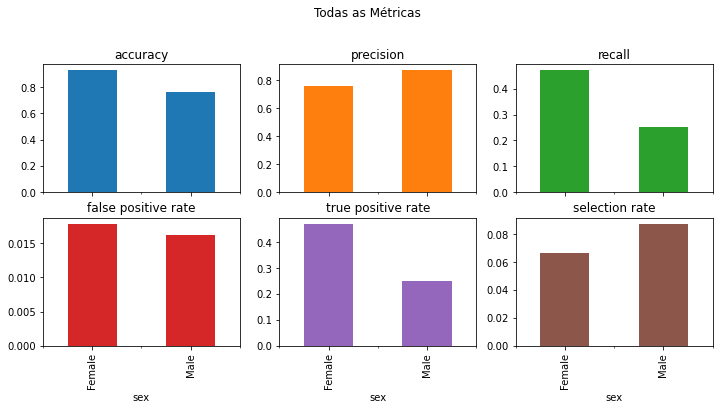

In [111]:
over_results.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12,8],
    title="Todas as Métricas"
)

## Undersampling

In [112]:
from imblearn.under_sampling import RandomUnderSampler

#criando modelo de undersampling
under_sampler = RandomUnderSampler(random_state=99)

In [113]:
#realizando reamostragem undersampling, utilizando o sexo como rótulo para o balanceamento
x_under, y_under = under_sampler.fit_resample(data.drop(['sex'], axis=1), data['sex'])

In [114]:
#concatenando dataframes gerados pelo under sampler, para recolocar o sexo como variável explicativa e mais50k como variável resposta
x_under['sex'] = y_under
data_under = x_under

data_under_y = data_under['mais50k']
data_under_x = data_under.drop(['mais50k'], axis=1)

In [115]:
#contagem da realização do undersampling
data_under_x['sex'].value_counts()

Female    16192
Male      16192
Name: sex, dtype: int64

In [116]:
#convertendo variáveis categóricas
data_under_x_dummies = pd.get_dummies(data_under_x)

In [117]:
#criação do classificador de árvore de decisão

decision_tree_undersampling = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)

In [118]:
#execução do treino e previsão do modelo justo
data_under_prev = run_classification(decision_tree_undersampling, data_under_x_dummies, data_under_y, data_under_x['sex'])

In [119]:
under_results = calculate_metrics(data_under_y, data_under_prev, data_under_x['sex'])

print(under_results.overall)
under_results.by_group

accuracy               0.845634
precision              0.711709
recall                 0.420342
false positive rate    0.044133
true positive rate     0.420342
selection rate         0.121572
dtype: object


,accuracy,precision,recall,false positive rate,true positive rate,selection rate
sex,,,,,,
Female,0.91749,0.620747,0.629169,0.047147,0.629169,0.110734
Male,0.773777,0.78778,0.344905,0.040283,0.344905,0.132411


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'precision'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'recall'}, xlabel='sex'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'true positive rate'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='sex'>],
       [<AxesSubplot:xlabel='sex'>, <AxesSubplot:xlabel='sex'>,
        <AxesSubplot:xlabel='sex'>]], dtype=object)

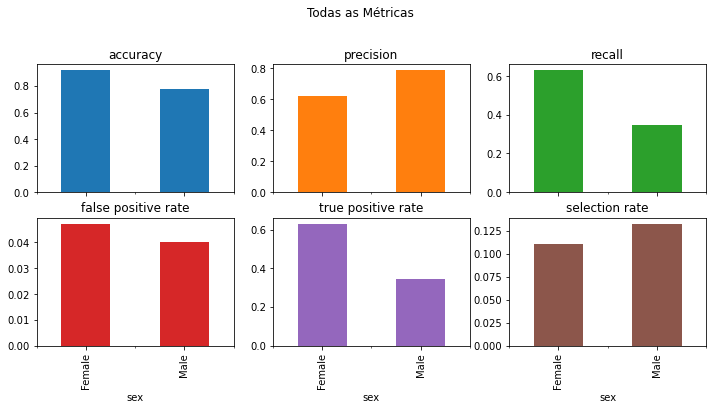

In [120]:
under_results.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12,8],
    title="Todas as Métricas"
)

# Atributo Sensível: Raça

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

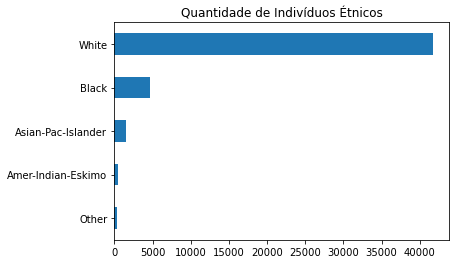

In [121]:
data['race'].value_counts().sort_values().plot(kind='barh', title='Quantidade de Indivíduos Étnicos')

data['race'].value_counts()

In [122]:
#separando os dados para execução do modelo
race_data_x = data.drop(['mais50k'], axis=1)
race_data_x_dummies = pd.get_dummies(race_data_x)

race_data_y = data['mais50k']

In [124]:
#criando modelo de previsão
race_decision_tree = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)

race_decision_tree_prev = run_classification(race_decision_tree, race_data_x_dummies, race_data_y, race_data_x['race'])

In [125]:
race_results = calculate_metrics(race_data_y, race_decision_tree_prev, race_data_x['race'])

print(race_results.overall)
race_results.by_group

accuracy               0.837865
precision               0.72196
recall                 0.524343
false positive rate    0.063518
true positive rate     0.524343
selection rate         0.173785
dtype: object


,accuracy,precision,recall,false positive rate,true positive rate,selection rate
race,,,,,,
Amer-Indian-Eskimo,0.83617,0.347222,0.454545,0.113253,0.454545,0.153191
Asian-Pac-Islander,0.789993,0.658451,0.457213,0.087387,0.457213,0.186965
Black,0.870438,0.472991,0.634276,0.097111,0.634276,0.162006
Other,0.79803,0.257576,0.34,0.13764,0.34,0.162562
White,0.836358,0.758177,0.522297,0.056716,0.522297,0.174968


In [126]:
#utilizando e balanceando brancos (41762) e negros (4685)

data_black_white = data[data.race.isin(['Black', 'White'])]

data_black_white['race'].value_counts()

White    41762
Black     4685
Name: race, dtype: int64

## Oversampling e Undersampling

In [127]:
def resample(sampling_model, data):
    x, y = sampling_model.fit_resample(
        data.drop(['race'], axis=1),
        data['race']
    )

    x['race'] = y
    data_y = x['mais50k']
    data_x = pd.get_dummies(x.drop(['mais50k'], axis=1))
    sensitive_feature = y

    return data_x, data_y, sensitive_feature

In [128]:
#realizando reamostragem over e undersampling dos dados de pessoas brancas e negras
bw_over_x, bw_over_y, bw_over_sen = resample(over_sampler, data_black_white)
bw_under_x, bw_under_y, bw_under_sen = resample(under_sampler, data_black_white)

In [129]:
#criando modelo árvore de decisão e realizando previsões

bw_decision_tree = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)

bw_over_prev = run_classification(bw_decision_tree, bw_over_x, bw_over_y, bw_over_sen)
bw_under_prev = run_classification(bw_decision_tree, bw_under_x, bw_under_y, bw_under_sen)

In [130]:
#calculando os valores das métricas
bw_over_results = calculate_metrics(bw_over_y, bw_over_prev, bw_over_sen)
bw_under_results = calculate_metrics(bw_under_y, bw_under_prev, bw_under_sen)

**OVERSAMPLING**
        accuracy precision    recall false positive rate true positive rate  \
race                                                                         
Black  0.909966  0.650046  0.562229            0.041898           0.562229   
White  0.821345  0.800765  0.394834            0.033446           0.394834   

      selection rate  
race                  
Black       0.105167  
White       0.125233  

**UNDERSAMPLING**
        accuracy precision    recall false positive rate true positive rate  \
race                                                                         
Black   0.91206  0.675799  0.522968            0.034474           0.522968   
White  0.810459  0.782214  0.359466            0.034423           0.359466   

      selection rate  
race                  
Black        0.09349  
White       0.117609  


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='race'>,
        <AxesSubplot:title={'center':'precision'}, xlabel='race'>,
        <AxesSubplot:title={'center':'recall'}, xlabel='race'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='race'>,
        <AxesSubplot:title={'center':'true positive rate'}, xlabel='race'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='race'>],
       [<AxesSubplot:xlabel='race'>, <AxesSubplot:xlabel='race'>,
        <AxesSubplot:xlabel='race'>]], dtype=object)

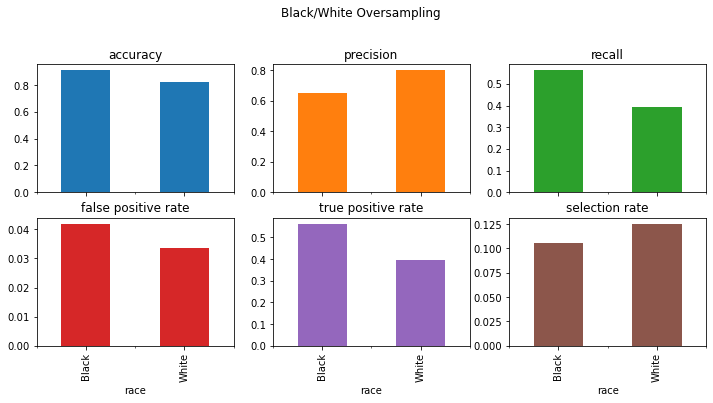

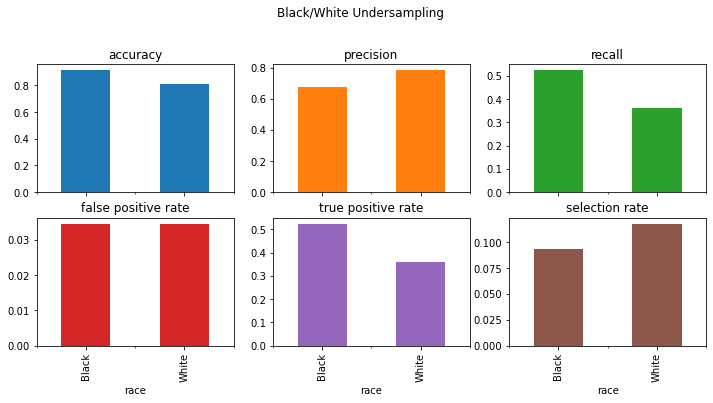

In [138]:
print('**OVERSAMPLING**\n', bw_over_results.by_group)

bw_over_results.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12,8],
    title="Black/White Oversampling"
)

print('\n**UNDERSAMPLING**\n', bw_under_results.by_group)

bw_under_results.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12,8],
    title="Black/White Undersampling"
)

# Modelos de Classificação Diferentes (Random Forest e Gradient Boosting)
## Utilizando Raça como Atributo Sensível

In [132]:
#executando com outros modelos
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#criando floresta aleatória
bw_random_forest = RandomForestClassifier(n_estimators=100,bootstrap=True, max_depth=3, max_features=9, max_leaf_nodes=8)

#criando aumento gradiente
bw_gradient_boost = GradientBoostingClassifier(n_estimators=100, max_depth=3, max_features=9, max_leaf_nodes=8, loss='deviance', learning_rate=0.2, subsample=1)


In [133]:
#pegando dummies das colunas do dataset
bw_x_dummies = pd.get_dummies(data_black_white.drop(['mais50k', 'race'], axis=1))

In [134]:
#executando treino e previsão dos dois modelos

bw_random_forest_prev = run_classification(bw_random_forest,
                                           bw_x_dummies,
                                           data_black_white['mais50k'],
                                           data_black_white['race'])

bw_gradient_boost_prev = run_classification(bw_gradient_boost,
                                           bw_x_dummies,
                                           data_black_white['mais50k'],
                                           data_black_white['race'])

In [135]:
#calculando valores métricos para os dois novos classificadores

bw_random_forest_results = calculate_metrics(data_black_white['mais50k'], bw_random_forest_prev, data_black_white['race'])

bw_gradient_boost_results = calculate_metrics(data_black_white['mais50k'], bw_gradient_boost_prev, data_black_white['race'])

In [142]:
bw_gradient_boost_results.by_group

,accuracy,precision,recall,false positive rate,true positive rate,selection rate
race,,,,,,
Black,0.865528,0.455056,0.572438,0.094198,0.572438,0.151974
White,0.850438,0.815694,0.531159,0.04086,0.531159,0.16539


**RANDOM FOREST**
        accuracy precision    recall false positive rate true positive rate  \
race                                                                         
Black   0.89349     0.768  0.169611            0.007041           0.169611   
White  0.781284  0.978558  0.141982            0.001059           0.141982   

      selection rate  
race                  
Black       0.026681  
White       0.036852  

**GRADIENT BOOSTING**
        accuracy precision    recall false positive rate true positive rate  \
race                                                                         
Black  0.865528  0.455056  0.572438            0.094198           0.572438   
White  0.850438  0.815694  0.531159             0.04086           0.531159   

      selection rate  
race                  
Black       0.151974  
White        0.16539  


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='race'>,
        <AxesSubplot:title={'center':'precision'}, xlabel='race'>,
        <AxesSubplot:title={'center':'recall'}, xlabel='race'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='race'>,
        <AxesSubplot:title={'center':'true positive rate'}, xlabel='race'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='race'>],
       [<AxesSubplot:xlabel='race'>, <AxesSubplot:xlabel='race'>,
        <AxesSubplot:xlabel='race'>]], dtype=object)

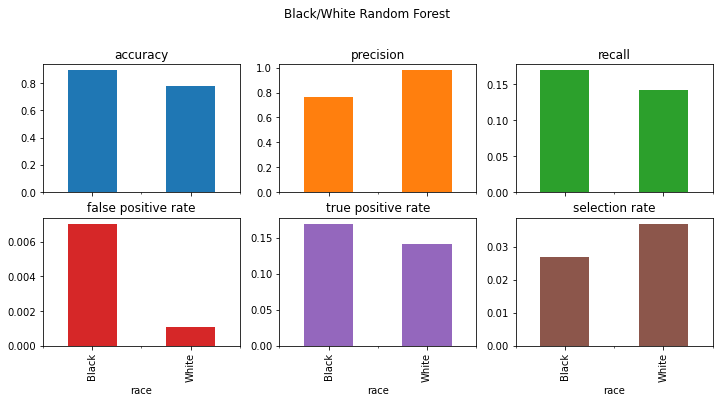

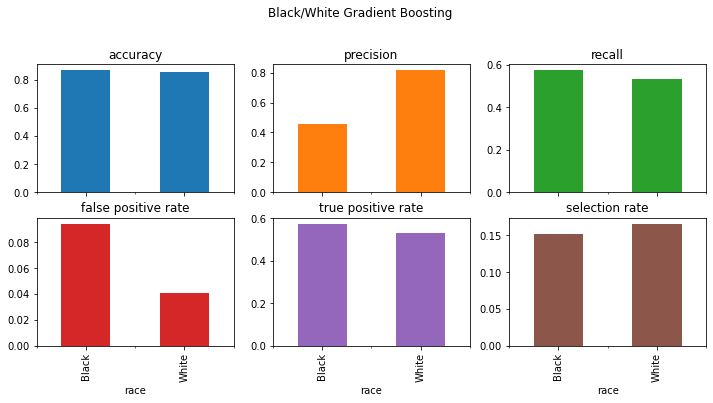

In [136]:
print('**RANDOM FOREST**\n', bw_random_forest_results.by_group)

bw_random_forest_results.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12,8],
    title="Black/White Random Forest"
)

print('\n**GRADIENT BOOSTING**\n', bw_gradient_boost_results.by_group)

bw_gradient_boost_results.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12,8],
    title="Black/White Gradient Boosting"
)